In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
import os
print(os.listdir('/content/gdrive/My Drive/datasets/trec'))

['trec-utf8']


Nb unique queries:  49806


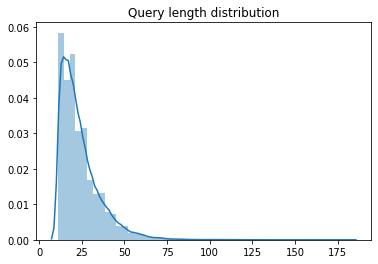

Text(0.5, 1.0, 'Token length distribution')

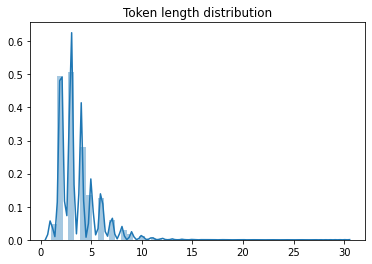

In [10]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

query_file='/content/gdrive/My Drive/datasets/trec/trec-utf8'
query_min_length = 10
val_split = 0.1

with open(query_file, encoding="utf8") as file_reader:
    raw_queries = file_reader.readlines()

queries = []
    
for raw_query in raw_queries:
    index = raw_query.rindex(':')
    query = raw_query[index+1:].lower()
    query = query.replace('\n','')
    
    if len(query) > query_min_length:
        queries.append(query)

queries = np.unique(queries)
random.shuffle(queries)

print("Nb unique queries: ",len(queries))

sns.distplot(list(map(lambda x: len(x), queries))).set_title("Query length distribution")
plt.show()
sns.distplot(list(map(lambda x: len(x.split(' ')), queries))).set_title("Token length distribution")


In [11]:
def get_random_char():
    return random.choice('abcdefghijklmnopqrstuvwxyz')

def alter(query):
    alter_count = random.randint(1,2)
    alter_mode = random.randint(1,3)
    char_query = list(query)
    
    for _ in range(alter_count):
        alter_pos = random.randint(0,len(char_query)-1)
        #ADD
        if alter_mode == 1:
            char_query.insert(alter_pos,get_random_char())
        #REMOVE
        elif alter_mode == 2:
            del char_query[alter_pos]
        #UPDATE
        else:
            char_query[alter_pos] = get_random_char()
    
    return "".join(char_query)


test = queries[100]
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))
print("%s %s" % (test,alter(test)))

silver american eagles silver americap eogles
silver american eagles silver abmerican eagles
silver american eagles silver american agles
silver american eagles silver american eagls
silver american eagles silver amercan agles
